# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [2]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-22 20:32:11--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-22 20:32:11--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [3]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [4]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [5]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [6]:
tabla = df[["gender", "age", "category", "payment_method", "shopping_mall"]]
tabla.head()

,gender,age,category,payment_method,shopping_mall
0,Female,28,Clothing,Credit Card,Kanyon
1,Male,21,Shoes,Debit Card,Forum Istanbul
2,Male,20,Clothing,Cash,Metrocity
3,Female,66,Shoes,Credit Card,Metropol AVM
4,Female,53,Books,Cash,Kanyon


Considero importante la columna de genero, edad, categoria, metodo de pago y centro comercial, esto debido a que nos da informacion importante de quien es el usuario y como o que elige comprar, son categorias que nos ayudan a defenir que indicadores usar para una mejor implementacion de las estrategias

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [8]:
duplicados = df[df.duplicated()]
print("Filas duplicadas:")

Filas duplicadas:


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [9]:
df["total value"] = df["price"] * df["quantity"]
(df[["price", "quantity", "total value"]].head())

,price,quantity,total value
0,1500.40,5,7502.00
1,1800.51,3,5401.53
2,300.08,1,300.08
3,3000.85,5,15004.25
4,60.60,4,242.40


In [10]:
df.groupby('customer_id')['price'].value_counts()

,,count
customer_id,price,
C100004,1500.40,1
C100005,1200.34,1
C100006,107.52,1
C100012,26.15,1
C100019,35.84,1
...,...,...
C999886,15.69,1
C999910,45.45,1
C999974,1500.40,1


La anterior tabla nos muestra la cantidad de veces de compra de los usuarios, esto nos permite saber que usuarios necesitan seguimiento y cuales tienen a los centros comerciales como punto de compra fijos, esto tambien lo podemos determinar con el precio y la categoria de compra

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

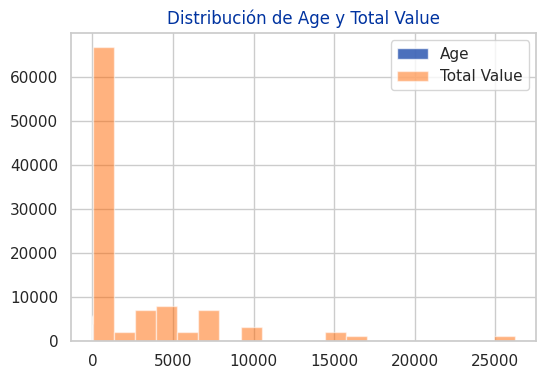

In [11]:
plt.figure(figsize=(6,4))
plt.hist(df["age"], bins=20, color="#0033A0", alpha=0.7, label="Age")
plt.hist(df["total value"], bins=20, color="#FF6600", alpha=0.5, label="Total Value")
plt.title("Distribución de Age y Total Value", color="#0033A0")
plt.legend()
plt.show()

El histograma muestra que hay una concentracion en la edad 0, esto nos muestra que hay un error en la distribucion de la edad o en la formulacion de los datos

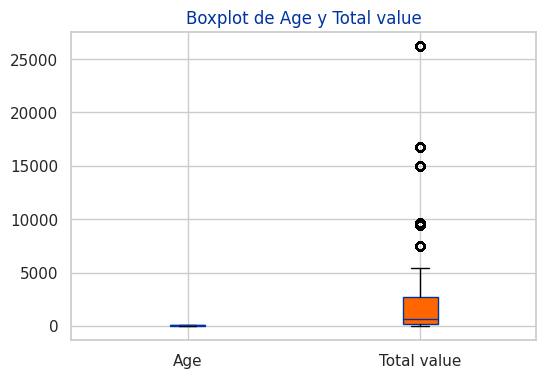

In [12]:
plt.figure(figsize=(6,4))
plt.boxplot([df["age"], df["total value"]], patch_artist=True,
             boxprops=dict(facecolor="#FF6600", color="#0033A0"),
             medianprops=dict(color="#0033A0"))
plt.xticks([1,2], ["Age", "Total value"])
plt.title("Boxplot de Age y Total value", color="#0033A0")
plt.show()

Al igual que con el histograma hay una concentracion fuerte en la edad 0 y mismo valor total registrado, con poca dispersion en otras edades, adicional a esto, el grupo de personas que lidera el valor de compra es bajo

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [13]:
df["age"].min()
df["age"].max()

69

In [14]:
import pandas as pd

bins = [0, 29, 59, 120]
labels = ["Jóvenes", "Adultos", "Mayores"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)

df["age_group"]

,age_group
0,Jóvenes
1,Jóvenes
2,Jóvenes
3,Mayores
4,Adultos
...,...
99452,Adultos
99453,Jóvenes
99454,Mayores
99455,Adultos


## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

Distribution of Categories:


,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


/tmp/ipython-input-3590025889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette=corporate_colors[:2])
/tmp/ipython-input-3590025889.py:5: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette=corporate_colors[:2])


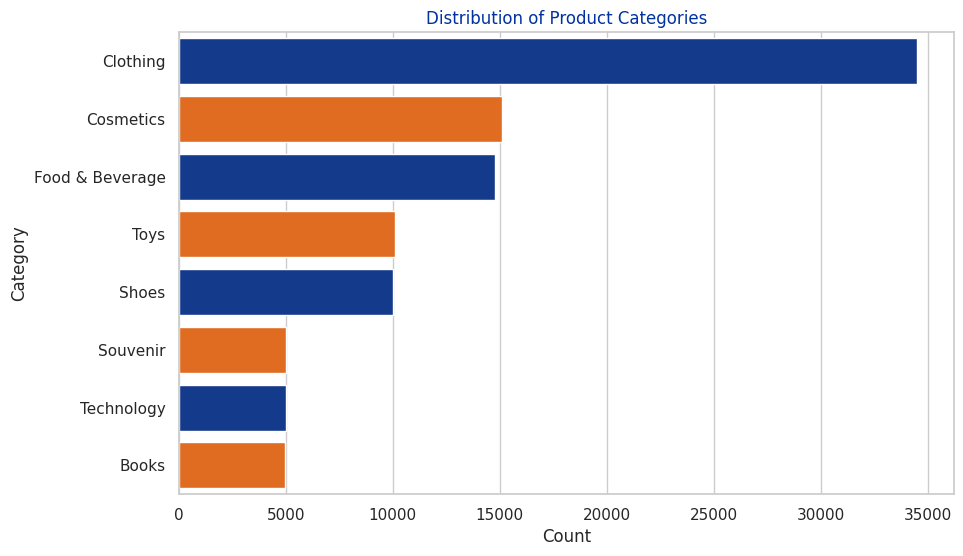


Distribution of Payment Methods:


,count
payment_method,
Cash,44447
Credit Card,34931
Debit Card,20079


/tmp/ipython-input-3590025889.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='payment_method', order=df['payment_method'].value_counts().index, palette=corporate_colors[:2])
/tmp/ipython-input-3590025889.py:15: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='payment_method', order=df['payment_method'].value_counts().index, palette=corporate_colors[:2])


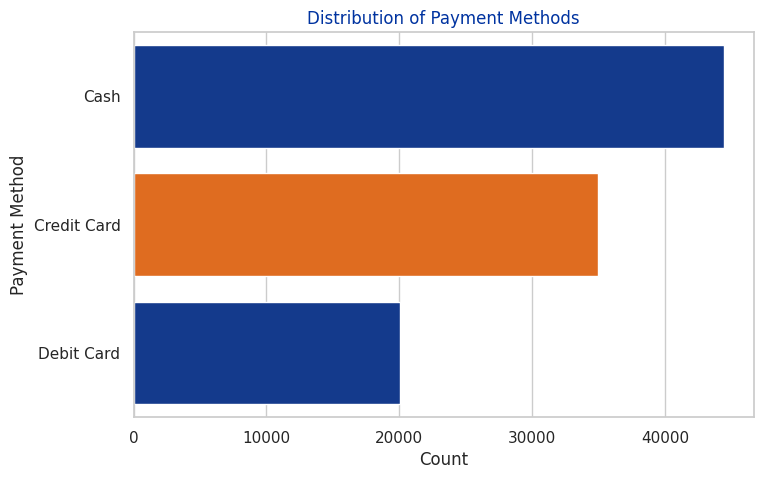


Distribution of Shopping Malls:


,count
shopping_mall,
Mall of Istanbul,19943
Kanyon,19823
Metrocity,15011
Metropol AVM,10161
Istinye Park,9781
Zorlu Center,5075
Cevahir AVM,4991
Forum Istanbul,4947
Viaport Outlet,4914


/tmp/ipython-input-3590025889.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='shopping_mall', order=df['shopping_mall'].value_counts().index, palette=corporate_colors[:2])
/tmp/ipython-input-3590025889.py:25: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='shopping_mall', order=df['shopping_mall'].value_counts().index, palette=corporate_colors[:2])


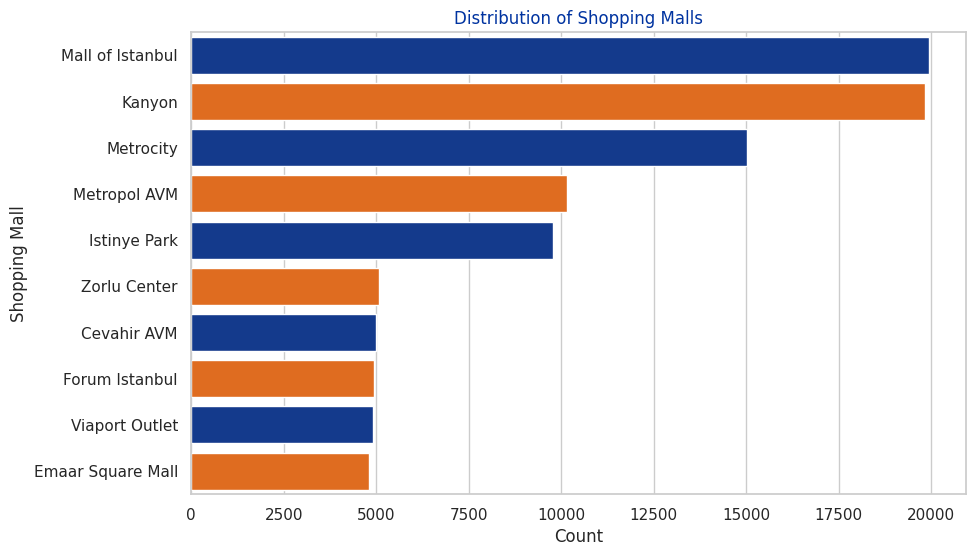

In [15]:
print("Distribution of Categories:")
display(df['category'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette=corporate_colors[:2])
plt.title('Distribution of Product Categories', color=corporate_colors[0])
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

print("\nDistribution of Payment Methods:")
display(df['payment_method'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='payment_method', order=df['payment_method'].value_counts().index, palette=corporate_colors[:2])
plt.title('Distribution of Payment Methods', color=corporate_colors[0])
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

print("\nDistribution of Shopping Malls:")
display(df['shopping_mall'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='shopping_mall', order=df['shopping_mall'].value_counts().index, palette=corporate_colors[:2])
plt.title('Distribution of Shopping Malls', color=corporate_colors[0])
plt.xlabel('Count')
plt.ylabel('Shopping Mall')
plt.show()

El metodo de pago y los centros comerciales mas concurridos son las dos variables que considero mas importantes, la forma de pago habla de la forma de consumo del usuario y de como adquiere los productos que bajo su percepcion considera necesarios, sabiendo esto se pueden realizar estrategias basadas en descuentos, cupones o gift cards para clientes que eligen una epoca para hacer compras sin dar mucha importancia al dinero, es decir, para cubrir una necesidad como lo es cumpleaños, festividades, deseos, cumplimiento de sueños en conjunto o meses previos a entradas de colegios eligen el dinero como una variabe secundaria y predomina el compromiso de cubrir una necesidad, ahora bien, teniendo presente los metodos de pago podemos reforzar los centros comerciales mas concurridos pero teniendo un enfoque en aquellos en los que el flujo de personas puede aumentar

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

In [16]:
# df["age"] = pd.to_numeric(df["age"], errors="coerce")
# df.head()


Tabla cruzada (Edad vs Frecuencia de Visitas):
category   Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
age_group                                                                 
Jóvenes     1162      8043       3413             3398   2342      1150   
Adultos     2862     19841       8795             8564   5752      2890   
Mayores      957      6603       2889             2814   1940       959   

category   Technology  Toys  
age_group                    
Jóvenes          1128  2407  
Adultos          2907  5760  
Mayores           961  1920  


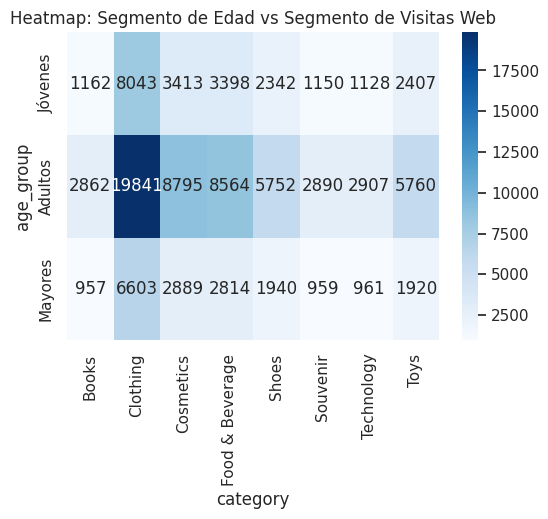

In [17]:
# =============================================================================
# 8. VISUALIZACIONES COMPARATIVAS
# =============================================================================

tabla_segmentos = pd.crosstab(df['age_group'], df['category'])
print("Tabla cruzada (Edad vs Frecuencia de Visitas):")
print(tabla_segmentos)

plt.figure(figsize=(6,4))
sns.heatmap(tabla_segmentos, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap: Segmento de Edad vs Segmento de Visitas Web')
plt.show()

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [ ]:
category_counts = df['category'].value_counts()
print("Category counts before grouping:")
display(category_counts)

# Define categories to be grouped into 'Other' (those with less than 5000 records)
categories_to_group = category_counts[category_counts < 5000].index.tolist()

# Replace these categories with 'Other'
df['category'] = df['category'].replace(categories_to_group, 'Other')

print("\nCategory counts after grouping:")
display(df['category'].value_counts())

Category counts before grouping:


,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981



Category counts after grouping:


,count
category,
Clothing,34487
Cosmetics,15097
Other,14976
Food & Beverage,14776
Toys,10087
Shoes,10034


Las categorias a agrupar que elegi para este ejercicio son los souvenir, tecnologia y los libros, esto porque son los que tienen menos registros a comparacion de las demas categorias

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [19]:
def asignar_segmento(row):
    return f"{row['category']}_{row['shopping_mall']}"

df['category'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['category'].value_counts().reset_index()
seg_counts.columns = ['category', 'shopping_mall']
seg_counts

,category,shopping_mall
0,Clothing_Mall of Istanbul,6923
1,Clothing_Kanyon,6840
2,Clothing_Metrocity,5268
3,Clothing_Metropol AVM,3525
4,Clothing_Istinye Park,3353
5,Cosmetics_Mall of Istanbul,3050
6,Other_Kanyon,3047
7,Cosmetics_Kanyon,3023
8,Other_Mall of Istanbul,2990
9,Food & Beverage_Mall of Istanbul,2957


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

La categoria que mas de destaca es la ropa, teniendo en cuenta esto se pueden seguir estrategias basadas en la tendencia generacional, se identifica por generacion que es lo que mas se usara previamente y esto se potencializara en fabricas y tiendas, esto para mantener o tener una percepcion mas atractiva por parte del consumidor, esta estrategia tambien se puede ejecutar con las demas categorias, haciendo una promocion masiva en los canales que mas se usan por generacion

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

1) Clothing
2) Mayor reconocimiento en la industria con estrategias basadas en las tendencias por generacion, aqui se pueden realizar campañas ya sean digitales o convencionales con referentes por cada generacion y comunicar valor desde diferentes tipos de formato como: valor, informativo, aspiracional, idealista etc
3) Los centros comerciales en los que mas compran ya tienen un reconocimiento en conjunto que promueve la decision de compra en personas cercanas al grupo inicial, las categorias se pueden potencializar teniendo en cuenta el publico que va y las horas a las que van, se puede hacer estrategias moviles en los centros comerciales para promover la compra, la diferenciacion y la percepcion de innovacion por parte de los consumidores, esto ultimo hara que el flujo de personas aumente y decidan comprar, una de las razones seria por el sentimiento de excasez por una rotacion rapida

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

1.
El segmento de jóvenes digitales está formado por personas entre los 18 y 35 años, que se caracterizan por comprar con frecuencia y mantenerse al día con las últimas tendencias. Les atraen especialmente los productos tecnológicos, la moda y los artículos de entretenimiento, como los juguetes o accesorios innovadores. Suelen pagar con tarjetas de débito o crédito, lo que muestra su confianza en los medios electrónicos y su preferencia por la rapidez y practicidad al comprar. La mayoría realiza sus compras en Mall of Istanbul y Kanyon, centros comerciales que combinan marcas modernas y tecnología

El segmento de adultos de valor medio comprende personas entre los 36 y 55 años, que mantienen un nivel de gasto moderado y muestran hábitos de consumo más equilibrados. Sus compras se reparten entre categorías como ropa, cosméticos y alimentos y bebidas, reflejando una combinación de necesidades prácticas y deseos personales. Este grupo utiliza una mezcla equilibrada de métodos de pago, alternando entre efectivo, tarjetas y medios digitales según la ocasión.

El segmento de mayores selectivos está compuesto por personas de 56 años en adelante, quienes realizan compras con menor frecuencia, pero con un mayor valor en cada transacción. Sus elecciones reflejan un consumo más cuidadoso y orientado a la calidad, con una clara preferencia por calzado, libros y cosméticos, productos que combinan confort, bienestar y gusto personal. A diferencia de los segmentos más jóvenes, este grupo muestra un mayor uso del efectivo, lo que evidencia hábitos tradicionales y una relación más conservadora con los medios de pago.

Respuesta final: El segmento de jovenes digitales, este grupo representa cerca del 35% al 40% del volumen total de transacciones, lo que los convierte en un segmento clave para el crecimiento del negocio. Su alta frecuencia de compra, que puede ser de tres a cinco veces mayor que la de otros segmentos, compensa su ticket promedio más bajo, generando un valor anual agregado superior. Además, por su edad y hábitos de consumo, tienen un alto potencial de Lifetime Value, con una relación comercial que podría mantenerse entre 30 y 40 años. Esto los posiciona como un público estratégico


2.
Canales digitales (40%): Redes sociales, email marketing, apps móviles - enfocado en Jóvenes Digitales
Marketing tradicional (25%): Publicidad en centros comerciales, vallas - para Adultos de Valor Medio
Programas de lealtad (20%): CRM, promociones personalizadas - todos los segmentos
Marketing experiencial (15%): Eventos en tiendas, demostraciones - enfocado en Mayores Selectivos

Respuesta final para el segmento de jovenes digitales:
A. Sistema de puntos y recompensas por visitas frecuentes
B. Colaboraciones con micro influencers y tech
C. Creacion de contenido en redes sociales
D. Pop ups, eventos de lanzamiento, uso de la realidad aumentada para mejor experiencia con usuarios
E. Descuentos y beneficios exclusivos

3.
Frecuencia de compra, engagement digital, conversion digital y convencional, lifetime value